## 모두를 위한 머신러닝/딥러닝 강의
김성훈 교수님의 모두를 위한 머신러닝/딥러닝 강의 중 lab 강의 코드입니다.
## Lab7_2 Softmax classifier for mnist data (mini-batch learning)
참고 : https://www.tensorflow.org/get_started/mnist/beginners

In [1]:
import sys, os
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import random
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777) #for reproducibility
os.listdir()

['.ipynb_checkpoints',
 'data-01-test-score.csv',
 'data-02-test-score.csv',
 'data-03-test-score.csv',
 'data-04-test-score.csv',
 'data-05-test-score.csv',
 'diabetes.csv',
 'DLEL.zip',
 'DLEL_1_TensorFlow_Basics.ipynb',
 'DLEL_2_Linear_regression.ipynb',
 'DLEL_3_Minimizing_Cost.ipynb',
 'DLEL_4_1_Multi-variable_linear_regression.ipynb',
 'DLEL_4_2_Loading_Data_from_File.ipynb',
 'DLEL_5_Logistic_regression.ipynb',
 'DLEL_6_Softmax_Classifier.ipynb',
 'DLEL_7_1_Learning_rate_&_Evaluation_&_pre-processing.ipynb',
 'DLEL_7_2_Softmax_classifier_for_mnist_data.ipynb',
 'MNIST_data',
 'zoo.csv']

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
nb_classes = 10
type(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
# graph setting (placeholder, Variable)
X = tf.placeholder(dtype = tf.float32, shape = [None, 784])
Y = tf.placeholder(dtype = tf.float32, shape = [None, nb_classes])

W = tf.Variable(initial_value = tf.random_normal(shape = [784, nb_classes]), name = 'weight')
b = tf.Variable(initial_value = tf.random_normal(shape = [nb_classes]), name = 'bias')

In [4]:
# graph setting (logits, cost)
logits = tf.matmul(X, W) + b
score = tf.nn.softmax(logits) # prediction을 위해
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits, axis = 1), tf.argmax(Y, axis = 1)), dtype = tf.float32))

# optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

epoch :    1, tr_cost : 13.3346, tr_acc : 13.76%, val_cost : 12.3029, val_acc : 13.66%
epoch :   51, tr_cost : 1.9077, tr_acc : 64.51%, val_cost : 1.8299, val_acc : 65.21%
epoch :  101, tr_cost : 1.2665, tr_acc : 74.47%, val_cost : 1.2016, val_acc : 75.48%
epoch :  151, tr_cost : 1.0320, tr_acc : 78.41%, val_cost : 0.9706, val_acc : 79.43%
epoch :  201, tr_cost : 0.9054, tr_acc : 80.74%, val_cost : 0.8472, val_acc : 81.52%
epoch :  251, tr_cost : 0.8246, tr_acc : 82.24%, val_cost : 0.7697, val_acc : 83.10%
epoch :  301, tr_cost : 0.7674, tr_acc : 83.25%, val_cost : 0.7159, val_acc : 84.30%
epoch :  351, tr_cost : 0.7241, tr_acc : 84.05%, val_cost : 0.6758, val_acc : 85.16%
epoch :  401, tr_cost : 0.6898, tr_acc : 84.72%, val_cost : 0.6446, val_acc : 85.82%
epoch :  451, tr_cost : 0.6616, tr_acc : 85.24%, val_cost : 0.6193, val_acc : 86.28%
epoch :  501, tr_cost : 0.6379, tr_acc : 85.70%, val_cost : 0.5983, val_acc : 86.56%
epoch :  551, tr_cost : 0.6174, tr_acc : 86.05%, val_cost : 0.5

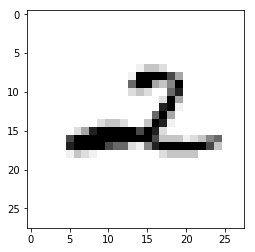

In [5]:
# parameters
epochs = 1000
batch_size = 100

# launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        val_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            tr_cost, _ = sess.run([cost, opt], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += tr_cost / total_batch
        if epoch % 50 == 0 or epoch == epochs:
            tr_acc = sess.run(acc, feed_dict = {X : mnist.train.images, Y : mnist.train.labels})
            val_cost, val_acc = sess.run([cost, acc], feed_dict = {X : mnist.test.images, Y : mnist.test.labels})
            print('epoch : {:4}, tr_cost : {:.4f}, tr_acc : {:.2%}, val_cost : {:.4f}, val_acc : {:.2%}'.format(epoch + 1,
                                                                                                                avg_cost, tr_acc,
                                                                                                                val_cost, val_acc))
    
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy: ", acc.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(score, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
         mnist.test.images[r:r + 1].reshape(28, 28),
         cmap='Greys',
         interpolation='nearest')
    plt.show()